In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report
from sklearn.metrics import mean_absolute_error

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [3]:
import os

path = os.listdir('/brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
np.unique(Y)

array([0, 1])

In [7]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

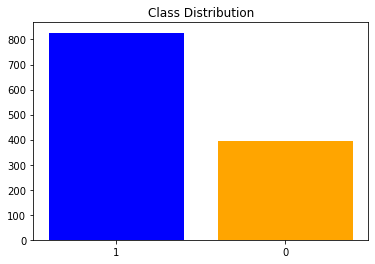

In [9]:
### Histogram frequency distribution for Class attribute

plt.bar(["1","0"],pd.Series(Y).value_counts(),color = ['blue','orange'])
plt.title("Class Distribution")
plt.show()

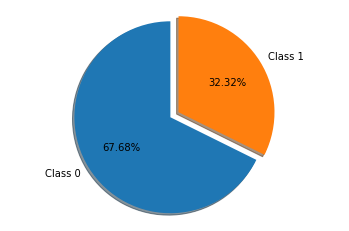

In [11]:
### Pie Chart for Class attribute

labels = 'Class 0' , 'Class 1'
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(pd.Series(Y).value_counts(), explode = explode ,labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [15]:
X.shape

(1222, 200, 200)

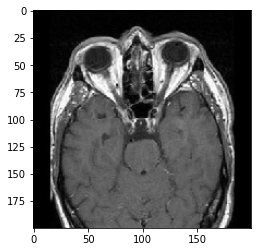

In [16]:
plt.imshow(X[0], cmap='gray')

In [17]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [19]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [20]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [30]:
X2 = X.copy()

In [35]:
from sklearn.decomposition import PCA

plt.style.use('ggplot')




In [36]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest


(977, 40000) (245, 40000)


In [44]:
# apply Logistic Regression
 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
 
# implemented our model through logistic regression
y_pred = lr.predict(xtest)
y_pred



C:\Users\ANANNYA\f1\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1])

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred))

0.9591836734693877


C:\Users\ANANNYA\f1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


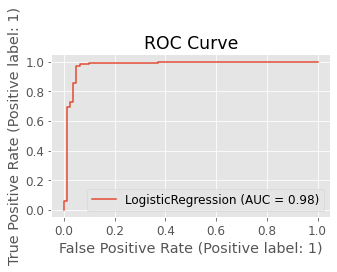

In [69]:
metrics.plot_roc_curve(lr,xtest, ytest) 
plt.title('ROC Curve')
plt.show()


TP Rate :  0.9817073170731707
TN Rate :  0.9135802469135802
FP Rate :  0.041666666666666664
FN Rate :  0.018292682926829267
Success Rate:  0.9591836734693877
Misclassifiaction Rate:  0.04081632653061224
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        81
           1       0.96      0.98      0.97       164

    accuracy                           0.96       245
   macro avg       0.96      0.95      0.95       245
weighted avg       0.96      0.96      0.96       245



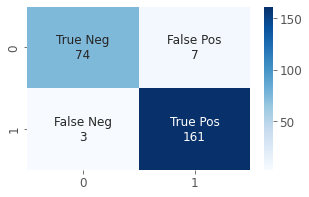

In [70]:
y_pred_lr = lr.predict(xtest)

cm_lr = confusion_matrix(ytest, y_pred_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_lr.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lr,annot=labels,fmt='',cmap='Blues')
print()

TP_lr = cm_lr[1][1]
FP_lr = cm_lr[0][1]
FN_lr = cm_lr[1][0]
TN_lr = cm_lr[0][0] 

print('TP Rate : ',TP_lr / (TP_lr+FN_lr))
print('TN Rate : ', TN_lr/(FP_lr+TN_lr))
print('FP Rate : ', FP_lr/(FP_lr+TP_lr))
print('FN Rate : ', FN_lr/(FN_lr+TP_lr))
print('Success Rate: ', (TP_lr+TN_lr)/(TP_lr+FP_lr+FN_lr+TN_lr))
print('Misclassifiaction Rate: ', (FP_lr+FN_lr)/(TP_lr+FP_lr+FN_lr+TN_lr))

print(classification_report(ytest, y_pred_lr))

In [71]:
y_pred_prob = lr.predict_proba(xtest)[0:10]
y_pred_prob_path = pd.DataFrame(data=y_pred_prob, columns=['Non-Tumor (0)', 'Tumor (1)'])

y_pred_prob_path.head()


,Non-Tumor (0),Tumor (1)
0,0.000399,0.999601
1,0.999995,0.000005
2,0.052651,0.947349
3,0.864231,0.135769
4,0.999521,0.000479


Text(0, 0.5, 'Frequency')

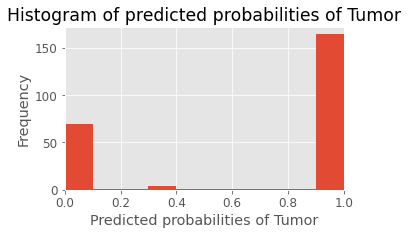

In [72]:
y_pred1 = lr.predict_proba(xtest)[:, 1]
plt.rcParams['font.size'] = 12
plt.hist(y_pred1, bins = 10)

plt.title('Histogram of predicted probabilities of Tumor')

plt.xlim(0,1)

plt.xlabel('Predicted probabilities of Tumor')
plt.ylabel('Frequency')

In [73]:
#Decision Tree

In [74]:
# apply Decision Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
 
y_pred = dtc.predict(xtest)
y_pred
 
print(accuracy_score(ytest, y_pred))
 

0.9510204081632653


C:\Users\ANANNYA\f1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


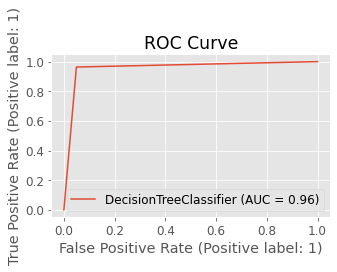

In [68]:
rcParams['figure.figsize'] = 5,3
tree2 = DecisionTreeClassifier(criterion='gini', max_depth= 6 , min_samples_split=10)
tree2.fit(xtrain , ytrain)
y_pred_dt = tree2.predict(xtest)



cm_dt = confusion_matrix(ytest, y_pred_dt)

metrics.plot_roc_curve(tree2, xtest, ytest) 
plt.title('ROC Curve')
plt.show()

TP Rate :  0.9634146341463414
TN Rate :  0.9506172839506173
FP Rate :  0.024691358024691357
FN Rate :  0.036585365853658534
Success Rate:  0.9591836734693877
Misclassifiaction Rate:  0.04081632653061224
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        81
           1       0.98      0.96      0.97       164

    accuracy                           0.96       245
   macro avg       0.95      0.96      0.95       245
weighted avg       0.96      0.96      0.96       245



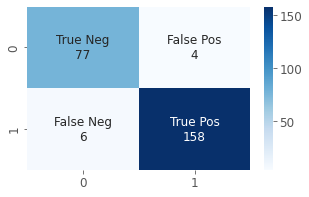

In [75]:
rcParams['figure.figsize'] = 5,3
tree2 = DecisionTreeClassifier(criterion='gini', max_depth= 6 , min_samples_split=10)
tree2.fit(xtrain , ytrain)
y_pred_dt = tree2.predict(xtest)

cm_dt = confusion_matrix(ytest, y_pred_dt)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_dt.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dt,annot=labels,fmt='',cmap='Blues')

TP_dt = cm_dt[1][1]
FP_dt = cm_dt[0][1]
FN_dt = cm_dt[1][0]
TN_dt = cm_dt[0][0] 

print('TP Rate : ',TP_dt / (TP_dt+FN_dt))
print('TN Rate : ', TN_dt/(FP_dt+TN_dt))
print('FP Rate : ', FP_dt/(FP_dt+TP_dt))
print('FN Rate : ', FN_dt/(FN_dt+TP_dt))
print('Success Rate: ', (TP_dt+TN_dt)/(TP_dt+FP_dt+FN_dt+TN_dt))
print('Misclassifiaction Rate: ', (FP_dt+FN_dt)/(TP_dt+FP_dt+FN_dt+TN_dt))

print(classification_report(ytest,y_pred_dt))

In [76]:
#SVM

In [77]:
# apply Support Vector Machine
from sklearn import svm
svc = svm.SVC()
svc.fit(xtrain,ytrain)
y_pred = svc.predict(xtest)
y_pred


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1])

In [78]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred))

0.963265306122449



TP Rate :  1.0
TN Rate :  0.35802469135802467
FP Rate :  0.24074074074074073
FN Rate :  0.0
Success Rate:  0.7877551020408163
Misclassifiaction Rate:  0.21224489795918366
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        81
           1       0.76      1.00      0.86       164

    accuracy                           0.79       245
   macro avg       0.88      0.68      0.70       245
weighted avg       0.84      0.79      0.75       245



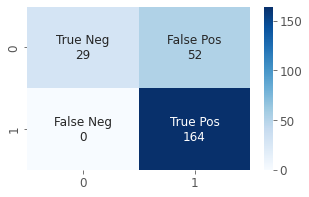

In [79]:
classifier_svc = SVC(kernel = 'rbf',C = 100,gamma=0.1)
classifier_svc.fit(xtrain, ytrain)
y_pred_svc = classifier_svc.predict(xtest)

cm_svc = confusion_matrix(ytest, y_pred_svc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_svc.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_svc,annot=labels,fmt='',cmap='Blues')
print()

TP_svc = cm_svc[1][1]
FP_svc = cm_svc[0][1]
FN_svc = cm_svc[1][0]
TN_svc = cm_svc[0][0] 

print('TP Rate : ',TP_svc / (TP_svc+FN_svc))
print('TN Rate : ', TN_svc/(FP_svc+TN_svc))
print('FP Rate : ', FP_svc/(FP_svc+TP_svc))
print('FN Rate : ', FN_svc/(FN_svc+TP_svc))
print('Success Rate: ', (TP_svc+TN_svc)/(TP_svc+FP_svc+FN_svc+TN_svc))
print('Misclassifiaction Rate: ', (FP_svc+FN_svc)/(TP_svc+FP_svc+FN_svc+TN_svc))

print(classification_report(ytest,y_pred_svc))

C:\Users\ANANNYA\f1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


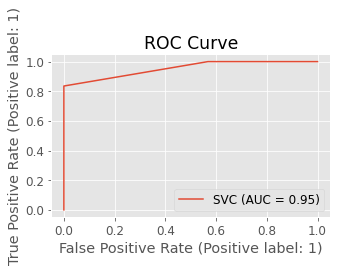

In [80]:
metrics.plot_roc_curve(classifier_svc, xtest, ytest) 
plt.title('ROC Curve')
plt.show()

In [81]:
#Random Forest

In [82]:
# apply Random Forest Classifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
 
y_pred = rfc.predict(xtest)
y_pred
 
print(accuracy_score(ytest, y_pred))

0.9755102040816327



TP Rate :  0.975609756097561
TN Rate :  0.9629629629629629
FP Rate :  0.018404907975460124
FN Rate :  0.024390243902439025
Success Rate:  0.9714285714285714
Misclassifiaction Rate:  0.02857142857142857
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        81
           1       0.98      0.98      0.98       164

    accuracy                           0.97       245
   macro avg       0.97      0.97      0.97       245
weighted avg       0.97      0.97      0.97       245



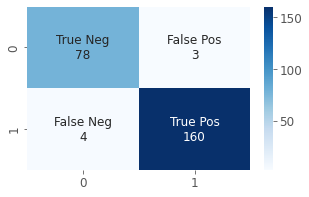

In [85]:
rf2 = RandomForestClassifier(bootstrap = True ,
                             oob_score=True,
                            n_estimators = 100,
                            max_features = 0.7,
                            criterion='entropy', 
                            max_depth= 9, 
                            min_samples_split=10)
rf2.fit(xtrain, ytrain)
y_train_pred_rf2 = rf2.predict(xtrain)
y_test_pred_rf2 = rf2.predict(xtest)

cm_rf = confusion_matrix(ytest, y_test_pred_rf2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_rf.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rf,annot=labels,fmt='',cmap='Blues')
print()

TP_rf = cm_rf[1][1]
FP_rf = cm_rf[0][1]
FN_rf = cm_rf[1][0]
TN_rf = cm_rf[0][0] 

print('TP Rate : ',TP_rf / (TP_rf+FN_rf))
print('TN Rate : ', TN_rf/(FP_rf+TN_rf))
print('FP Rate : ', FP_rf/(FP_rf+TP_rf))
print('FN Rate : ', FN_rf/(FN_rf+TP_rf))
print('Success Rate: ', (TP_rf+TN_rf)/(TP_rf+FP_rf+FN_rf+TN_rf))
print('Misclassifiaction Rate: ', (FP_rf+FN_rf)/(TP_rf+FP_rf+FN_rf+TN_rf))

print(classification_report(ytest, y_test_pred_rf2))

C:\Users\ANANNYA\f1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


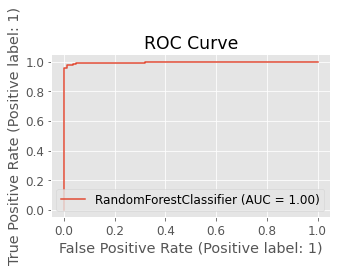

In [86]:
metrics.plot_roc_curve(rf2, xtest, ytest) 
plt.title('ROC Curve')
plt.show()